In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Importing data

In [22]:
train = pd.read_csv("data/train.csv", index_col=0)
train = train.drop(['decade_released','genres'], axis = 1)
train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
5527,1.680,34.059,8.671,3300000.0,10000000.0,8,0
3263,18.013,46.018,9.456,26000000.0,34592118.0,200,0
1022,17.237,182.113,198.986,65000000.0,163247198.0,1122,0
4603,11.931,110.585,44.527,20000000.0,16605763.0,129,0
2733,14.717,99.835,75.898,51000000.0,47231070.0,405,0
...,...,...,...,...,...,...,...
4447,4.148,18.300,13.422,3230939.0,18000000.0,44,0
1479,16.122,72.172,50.678,40000000.0,111811453.0,2042,0
8772,1.712,43.027,8.754,577450.0,1154901.0,6,0
5071,16.830,103.881,108.412,15000000.0,12834936.0,974,0


In [28]:
oversampling_train = pd.read_csv("data/oversampled-train.csv", index_col = 0)
oversampling_train = oversampling_train.drop(['genres','decade_released'], axis = 1)
oversampling_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
0,1.680,34.059,8.671,3300000.0,1.000000e+07,8,0
1,18.013,46.018,9.456,26000000.0,3.459212e+07,200,0
2,17.237,182.113,198.986,65000000.0,1.632472e+08,1122,0
3,11.931,110.585,44.527,20000000.0,1.660576e+07,129,0
4,14.717,99.835,75.898,51000000.0,4.723107e+07,405,0
...,...,...,...,...,...,...,...
5891,37.911,85.372,41.670,140000000.0,1.095781e+08,2929,1
5892,71.879,147.898,256.890,150000000.0,1.023784e+09,12834,1
5893,26.437,124.173,266.202,76000000.0,7.059546e+07,5173,1
5894,27.112,74.206,38.326,5000000.0,5.380118e+06,2951,1


In [38]:
smoteenn_train = pd.read_csv("data/smoteenn-train.csv", index_col = 0)
smoteenn_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
0,1.680000,34.059000,8.671000,3.300000e+06,1.000000e+07,8,0
1,11.931000,110.585000,44.527000,2.000000e+07,1.660576e+07,129,0
2,14.717000,99.835000,75.898000,5.100000e+07,4.723107e+07,405,0
3,12.050000,33.433000,10.263000,1.750000e+07,2.502492e+07,380,0
4,7.503000,36.672000,13.520000,1.600000e+05,4.000000e+06,51,0
...,...,...,...,...,...,...,...
3690,4.073709,4.324492,10.265746,1.488598e+05,4.524191e+05,109,1
3691,67.239940,80.192475,41.951580,1.549019e+07,2.073527e+08,7696,1
3692,21.451971,137.467166,43.816913,9.171183e+07,1.083746e+08,1708,1
3693,33.474275,118.201078,48.248315,1.265054e+07,1.005731e+08,5931,1


In [98]:
smotetomek_train = pd.read_csv("data/smotetomek-train.csv", index_col = 0)
smotetomek_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
0,1.680000,34.059000,8.671000,3.300000e+06,1.000000e+07,8,0
1,18.013000,46.018000,9.456000,2.600000e+07,3.459212e+07,200,0
2,11.931000,110.585000,44.527000,2.000000e+07,1.660576e+07,129,0
3,14.717000,99.835000,75.898000,5.100000e+07,4.723107e+07,405,0
4,23.357000,99.896000,62.278000,3.200000e+07,8.361541e+07,897,0
...,...,...,...,...,...,...,...
6857,21.451971,137.467166,43.816913,9.171183e+07,1.083746e+08,1708,1
6858,33.474275,118.201078,48.248315,1.265054e+07,1.005731e+08,5931,1
6859,26.421068,134.796016,25.145178,4.294768e+06,4.019351e+08,3132,1
6860,12.187359,37.095476,24.018535,3.327034e+06,1.191643e+07,622,1


In [56]:
test = pd.read_csv("data/test.csv", index_col = 0)
test = test.drop(['genres','decade_released'], axis = 1)
test
#[train['budget'] == 0]

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [73]:
def visualize_preds(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)
    
    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    precision = cf[1,1] / sum(cf[:,1])
    recall    = cf[1,1] / sum(cf[1,:])
    f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')

## 1. Classification of train by Logistic Regression

<AxesSubplot:xlabel='popularity', ylabel='is_good'>

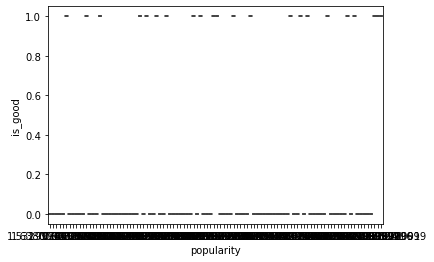

In [74]:
#Visualizing the data 
fig = plt.plot(figSize = (24,24))
sb.boxplot(data = train.iloc[:100], x = "popularity", y = "is_good")

In [78]:
#Assign x and y value
y_train = train['is_good']
x_train = train.drop(['is_good','revenue'], axis = 1) # Remove the response variable
y_test = test['is_good']
x_test = test.drop(['is_good','revenue'], axis = 1) # Remove the response variable

#The correlation of data
train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
popularity,1.000000,0.276604,0.262988,0.298602,0.287449,0.307792,0.089654
casts_popularity_sum,0.276604,1.000000,0.547721,0.627959,0.567103,0.592943,0.087012
crews_popularity_sum,0.262988,0.547721,1.000000,0.606373,0.577527,0.624987,0.109554
budget,0.298602,0.627959,0.606373,1.000000,0.726570,0.592316,0.001421
revenue,0.287449,0.567103,0.577527,0.726570,1.000000,0.774910,0.158671
vote_count,0.307792,0.592943,0.624987,0.592316,0.774910,1.000000,0.325379
is_good,0.089654,0.087012,0.109554,0.001421,0.158671,0.325379,1.000000


In [79]:
#Perform the logistics regression
logreg1 = LogisticRegression()
 
#Fit the data
logreg1.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
print("Logistic Regression")
print("The coefficient (slope) of the function\t: ",  logreg1.coef_)
print("The intercept of the line \t\t: ", logreg1.intercept_)
print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg1.score(x_test,y_test))

Logistic Regression
The coefficient (slope) of the function	:  [[-3.16205019e-07 -8.86579013e-06 -1.44453733e-06 -4.71248300e-08
   4.27433055e-04]]
The intercept of the line 		:  [-2.6354155e-07]

The overall classification accuracy 	:  0.7906647807637907


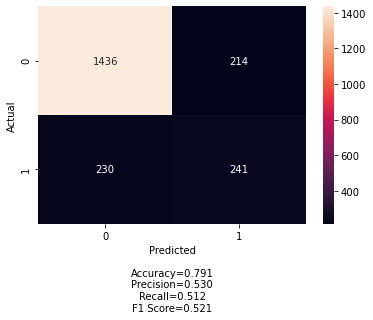

In [80]:
#Predict the data
y_test_pred = logreg1.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred)

## 2. Classification of oversampling train by Logistic Regression

<AxesSubplot:xlabel='popularity', ylabel='is_good'>

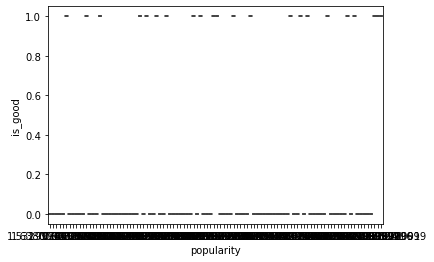

In [82]:
#Visualizing the data 
fig = plt.plot(figSize = (24,24))
sb.boxplot(data = oversampling_train.iloc[:100], x = "popularity", y = "is_good")

In [83]:
#Assign x and y value
y_train = oversampling_train['is_good']
x_train = oversampling_train.drop(['is_good','revenue'], axis = 1) # Remove the response variable

#The correlation of data
oversampling_train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
popularity,1.000000,0.281270,0.253074,0.307970,0.293898,0.315259,0.101899
casts_popularity_sum,0.281270,1.000000,0.539087,0.633633,0.558953,0.603797,0.095573
crews_popularity_sum,0.253074,0.539087,1.000000,0.595812,0.610333,0.643590,0.125451
budget,0.307970,0.633633,0.595812,1.000000,0.733091,0.589991,0.002633
revenue,0.293898,0.558953,0.610333,0.733091,1.000000,0.773216,0.168040
vote_count,0.315259,0.603797,0.643590,0.589991,0.773216,1.000000,0.340183
is_good,0.101899,0.095573,0.125451,0.002633,0.168040,0.340183,1.000000


In [85]:
#Perform the logistics regression
logreg_oversampling = LogisticRegression()
 
#Fit the data
logreg_oversampling.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
print("Logistic Regression")
print("The coefficient (slope) of the function\t: ",  logreg_oversampling.coef_)
print("The intercept of the line \t\t: ", logreg_oversampling.intercept_)
print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg_oversampling.score(x_test,y_test))

Logistic Regression
The coefficient (slope) of the function	:  [[ 1.08170185e-06 -2.94343148e-06  1.33490581e-06 -3.50687011e-08
   4.53741327e-04]]
The intercept of the line 		:  [-1.1662741e-07]

The overall classification accuracy 	:  0.7562470532767562


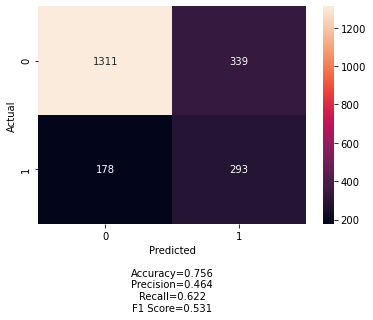

In [87]:
#Predict the data
y_test_pred = logreg_oversampling.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred)

## 3.Classification of smoteenn train using Logistic Regression

<AxesSubplot:xlabel='popularity', ylabel='is_good'>

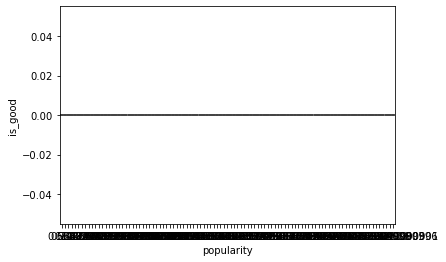

In [89]:
#Visualizing the data 
fig = plt.plot(figSize = (24,24))
sb.boxplot(data = smoteenn_train.iloc[:100], x = "popularity", y = "is_good")

In [92]:
#Assign x and y value
y_train = smoteenn_train['is_good']
x_train = smoteenn_train.drop(['is_good','revenue'], axis = 1) # Remove the response variable

#The correlation of data
smoteenn_train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
popularity,1.000000,0.380063,0.339282,0.375794,0.395965,0.397385,0.152676
casts_popularity_sum,0.380063,1.000000,0.661458,0.722744,0.684788,0.674987,0.139101
crews_popularity_sum,0.339282,0.661458,1.000000,0.690586,0.690944,0.715940,0.166583
budget,0.375794,0.722744,0.690586,1.000000,0.785704,0.642299,0.011166
revenue,0.395965,0.684788,0.690944,0.785704,1.000000,0.813875,0.256891
vote_count,0.397385,0.674987,0.715940,0.642299,0.813875,1.000000,0.383275
is_good,0.152676,0.139101,0.166583,0.011166,0.256891,0.383275,1.000000


In [93]:
#Perform the logistics regression
logreg_smoteenn = LogisticRegression()
 
#Fit the data
logreg_smoteenn.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
print("Logistic Regression")
print("The coefficient (slope) of the function\t: ",  logreg_smoteenn.coef_)
print("The intercept of the line \t\t: ", logreg_smoteenn.intercept_)
print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg_smoteenn.score(x_test,y_test))

Logistic Regression
The coefficient (slope) of the function	:  [[ 5.17839691e-06  6.24382856e-06  7.93397867e-06 -5.15143424e-08
   1.02428304e-03]]
The intercept of the line 		:  [1.98210093e-08]

The overall classification accuracy 	:  0.7062706270627063


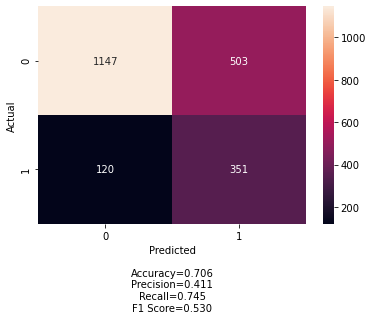

In [94]:
#Predict the data
y_test_pred = logreg_smoteenn.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred)

## 4. Classification of smotetomek train using Logistic Regression

<AxesSubplot:xlabel='popularity', ylabel='is_good'>

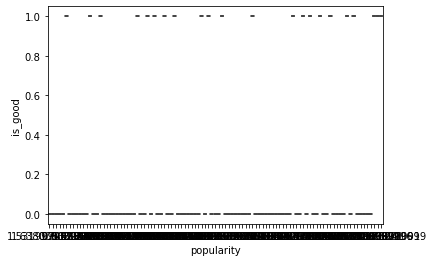

In [99]:
#Visualizing the data 
fig = plt.plot(figSize = (24,24))
sb.boxplot(data = smotetomek_train.iloc[:100], x = "popularity", y = "is_good")

In [100]:
#Assign x and y value
y_train = smotetomek_train['is_good']
x_train = smotetomek_train.drop(['is_good','revenue'], axis = 1) # Remove the response variable

#The correlation of data
smotetomek_train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,revenue,vote_count,is_good
popularity,1.000000,0.325325,0.282471,0.326616,0.324363,0.337479,0.121546
casts_popularity_sum,0.325325,1.000000,0.623341,0.684323,0.643443,0.650442,0.107451
crews_popularity_sum,0.282471,0.623341,1.000000,0.663896,0.644233,0.678767,0.130573
budget,0.326616,0.684323,0.663896,1.000000,0.768943,0.621966,-0.000574
revenue,0.324363,0.643443,0.644233,0.768943,1.000000,0.790271,0.173974
vote_count,0.337479,0.650442,0.678767,0.621966,0.790271,1.000000,0.330781
is_good,0.121546,0.107451,0.130573,-0.000574,0.173974,0.330781,1.000000


In [101]:
#Perform the logistics regression
logreg_smotetomek = LogisticRegression()
 
#Fit the data
logreg_smotetomek.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
print("Logistic Regression")
print("The coefficient (slope) of the function\t: ",  logreg_smotetomek.coef_)
print("The intercept of the line \t\t: ", logreg_smotetomek.intercept_)
print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg_smotetomek.score(x_test,y_test))

Logistic Regression
The coefficient (slope) of the function	:  [[ 3.25542380e-06  3.15737515e-06  4.37281826e-06 -3.28783223e-08
   6.06017876e-04]]
The intercept of the line 		:  [1.42155185e-10]

The overall classification accuracy 	:  0.7161716171617162


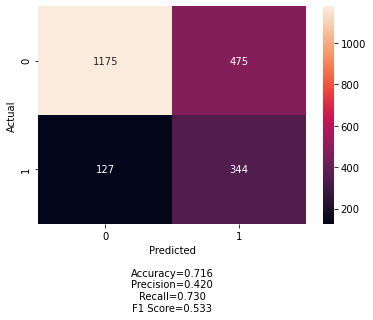

In [102]:
#Predict the data
y_test_pred = logreg_smotetomek.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred)